In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv("agaricus-lepiota (1).data", header = None)
header = ['edibility','cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']
df = df.rename(columns=dict(zip(df.columns, header)))
le = LabelEncoder()
print(df.head())

  edibility cap_shape cap_surface cap_color bruises odor gill_attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                      w                      w         

In [3]:
df.isnull().sum()

edibility                   0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [16]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

print(df.head())

   edibility  cap_shape  cap_surface  cap_color  bruises  odor  \
0          1          5            2          4        1     6   
1          0          5            2          9        1     0   
2          0          0            2          8        1     3   
3          1          5            3          8        1     6   
4          0          5            2          3        0     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  \
0                1             0          1           4  ...   
1                1             0          0           4  ...   
2                1             0          0           5  ...   
3                1             0          1           5  ...   
4                1             1          0           4  ...   

   stalk_surface_below_ring  stalk_color_above_ring  stalk_color_below_ring  \
0                         2                       7                       7   
1                         2                       7         

In [6]:
print("Odor - Mean:", df["odor"].mean(), " Median:", df["odor"].median(), " Variance:",df["odor"].var(), " Mode:", df["odor"].mode().item())
print("Cap Color - Mean:", df["cap_color"].mean(), " Median:", df["cap_color"].median(), " Variance:",df["cap_color"].var(), " Standard Deviation:", df["cap_color"].std(), " Mode:", df["cap_color"].mode().item())


Odor - Mean: 4.144756277695716  Median: 5.0  Variance: 4.425676057790205  Mode: 5
Cap Color - Mean: 4.504677498769079  Median: 4.0  Variance: 6.4812042662866896  Standard Deviation: 2.5458209415209643  Mode: 4


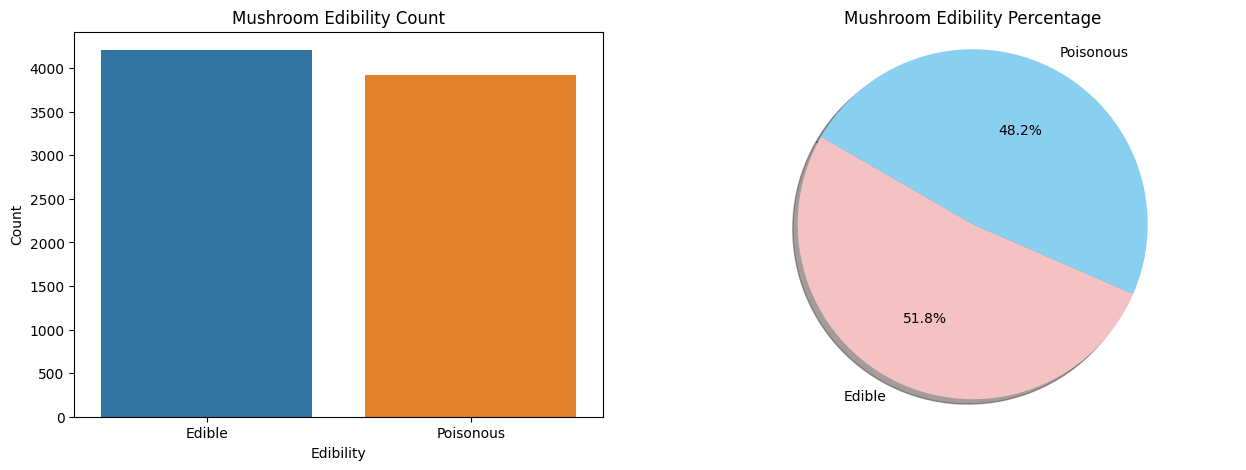

In [7]:
plt.figure(figsize=(15,5))
ax = plt.subplot(121)
ind = [0,1]
sns.countplot(x = "edibility", data = df)
ax.set_xticks(ind)
ax.set_xticklabels(('Edible','Poisonous'), fontsize = 10)
plt.title("Mushroom Edibility Count")
plt.xlabel('Edibility')
plt.ylabel("Count")
plt.subplot(122)
edible_val = df['edibility'].value_counts()
edible_size = edible_val.values.tolist()
edible_type = edible_val.axes[0].tolist()
edible_labels = 'Edible', 'Poisonous'
colors = ['#F4C2C2', '#89CFF0']
# patches, texts, autotexts = 
plt.pie(edible_size, labels=edible_labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')  
plt.title("Mushroom Edibility Percentage")
plt.show()

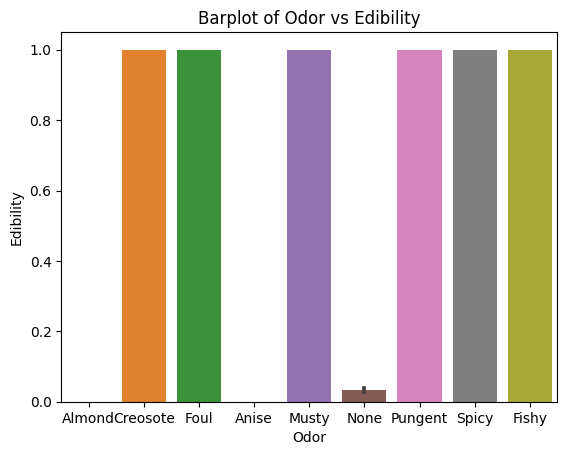

In [8]:
sns.barplot(data=df, x = "odor", y="edibility")
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
x_labels = ["Almond", "Creosote", "Foul", "Anise", "Musty", "None", "Pungent", "Spicy", "Fishy"]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title("Barplot of Odor vs Edibility")
plt.xlabel('Odor')
plt.ylabel("Edibility")
plt.show()

0 is edible and 1 is poisonous. odor with 3 and 0 are edible and 1,2,4 etc are po and 5 is mostly edible.

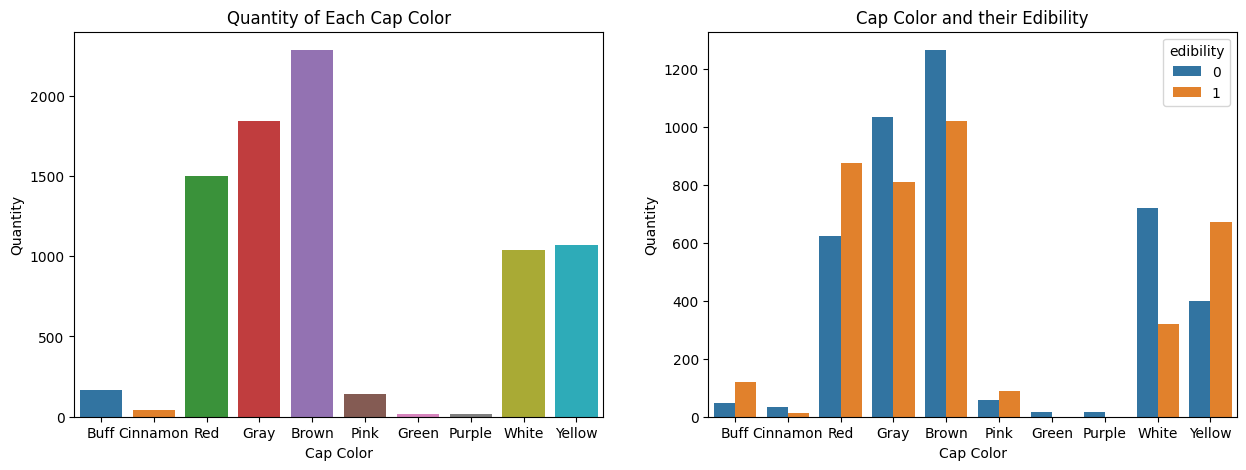

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x = "cap_color", data = df)
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_labels = ['Buff','Cinnamon','Red','Gray','Brown','Pink','Green','Purple','White','Yellow']
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title("Quantity of Each Cap Color")
plt.xlabel('Cap Color')
plt.ylabel("Quantity")
plt.subplot(122)
sns.countplot(x = "cap_color", hue = "edibility" ,data = df)
x_ticks2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_labels2 = ['Buff','Cinnamon','Red','Gray','Brown','Pink','Green','Purple','White','Yellow']
plt.xticks(ticks=x_ticks2, labels=x_labels)
plt.title("Cap Color and their Edibility")
plt.xlabel('Cap Color')
plt.ylabel("Quantity")
plt.show()

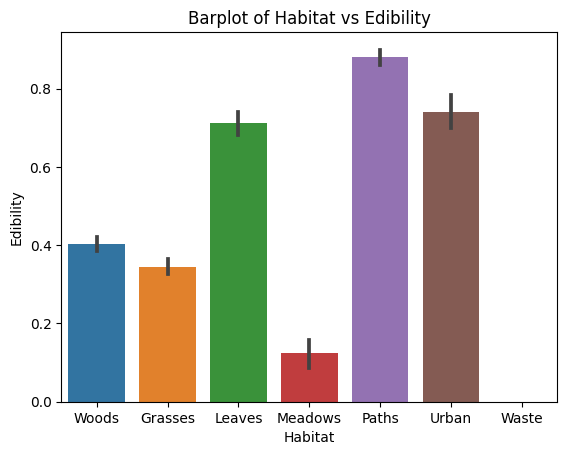

In [10]:
sns.barplot(data = df, x="habitat", y="edibility")
x_ticks = [0, 1, 2, 3, 4, 5, 6]
x_labels = ["Woods", "Grasses", "Leaves", "Meadows", "Paths", "Urban", "Waste"]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title("Barplot of Habitat vs Edibility")
plt.xlabel('Habitat')
plt.ylabel("Edibility")
plt.show()

In [11]:
df_encoded = pd.get_dummies(df, columns = ['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat'])


In [12]:
print(df_encoded.head())

   edibility  cap_shape_0  cap_shape_1  cap_shape_2  cap_shape_3  cap_shape_4  \
0          1            0            0            0            0            0   
1          0            0            0            0            0            0   
2          0            1            0            0            0            0   
3          1            0            0            0            0            0   
4          0            0            0            0            0            0   

   cap_shape_5  cap_surface_0  cap_surface_1  cap_surface_2  ...  \
0            1              0              0              1  ...   
1            1              0              0              1  ...   
2            0              0              0              1  ...   
3            1              0              0              0  ...   
4            1              0              0              1  ...   

   population_3  population_4  population_5  habitat_0  habitat_1  habitat_2  \
0             1         

In [13]:
x = df_encoded.drop('edibility', axis =1)
y= df_encoded['edibility']
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=12)


In [14]:
clf = DecisionTreeClassifier(random_state=19)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=19)

In [15]:
y_pred = clf.predict(x_val)
accuracy = accuracy_score(y_val,y_pred)
print(f"Accuracy:  {accuracy:.2f}")

Accuracy:  1.00
